<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Credit_card_Defaulters./blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


In [122]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns



## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [235]:
#store dataset as df Replace 0st Row with 1st row, make Id as index.  
df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Supervised Classification - Credit card/Copy of default of credit card clients.csv",header = 1, index_col ='ID')

#Lets Understand the DataSet

In [236]:
print(df.shape)
df.head()


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Feature Renaming to make them comprehensive**

In [237]:
#Rename
df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR',
            'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR',
              'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR',
                'default payment next month':'IS_Defaulter'},inplace=True)


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      30000 non-null  int64
 1   SEX            30000 non-null  int64
 2   EDUCATION      30000 non-null  int64
 3   MARRIAGE       30000 non-null  int64
 4   AGE            30000 non-null  int64
 5   PAY_SEP        30000 non-null  int64
 6   PAY_AUG        30000 non-null  int64
 7   PAY_JUL        30000 non-null  int64
 8   PAY_JUN        30000 non-null  int64
 9   PAY_MAY        30000 non-null  int64
 10  PAY_APR        30000 non-null  int64
 11  BILL_AMT_SEPT  30000 non-null  int64
 12  BILL_AMT_AUG   30000 non-null  int64
 13  BILL_AMT_JUL   30000 non-null  int64
 14  BILL_AMT_JUN   30000 non-null  int64
 15  BILL_AMT_MAY   30000 non-null  int64
 16  BILL_AMT_APR   30000 non-null  int64
 17  PAY_AMT_SEPT   30000 non-null  int64
 18  PAY_AMT_AUG    30000 non-null  int64
 19  PAY_

In [239]:
#Function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [240]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
LIMIT_BAL,int64,81,0,30000
SEX,int64,2,0,30000
EDUCATION,int64,7,0,30000
MARRIAGE,int64,4,0,30000
AGE,int64,56,0,30000
PAY_SEP,int64,11,0,30000
PAY_AUG,int64,11,0,30000
PAY_JUL,int64,11,0,30000
PAY_JUN,int64,11,0,30000
PAY_MAY,int64,10,0,30000


In [241]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [242]:
def dataset_unique(df):
  '''This Function will give unique values and theire count for a dataframe
  '''
  for i in df:
    print(i,f"Has : {len(df[i].unique())} Unique_values : {df[i].unique()}")
    print("--------------------------------------------------------------------------------")
 


In [243]:
dataset_unique(df)

LIMIT_BAL Has : 81 Unique_values : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------------------------------------
SEX Has : 2 Unique_values : [2 1]
--------------------------------------------------------------------------------
EDUCATION Has : 7 Unique_values : [2 1 3 5 4 6 0]
-------------------------------------------------------------

**Observation**
* There is No null value in the data but we have Zero which need to be handelled.
* All the features are interger type.
* There can be outliers in the feature "LIMIT_BAL",AGE,BAL_AMT's & PAY_AMT"S 

#Data Preprocessing

**SEX :-(1 = male; 2 = female)**

In [244]:
print(df['SEX'].value_counts())

df.loc[df["SEX"]==1, 'SEX'] = "MALE"
df.loc[df["SEX"]==2, 'SEX'] = "FEMALE"
print(df['SEX'].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
FEMALE    18112
MALE      11888
Name: SEX, dtype: int64


**Education:-(1 = graduate school; 2 = university; 3 = high school; 4 = others).**

In [245]:
#Replace 0,5,6 with 4
df["EDUCATION"]=df["EDUCATION"].replace([0,5,6],4)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**Marriage:-(1 = married; 2 = single; 3 = others)**

In [246]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**Payment Duration:-( -1 = pay duly; 1 = delay for 1 month; 2 = delay for 2 months,.. 8 = payment delay for 8 months)**
* Also we take the help of ineternet explore to find -2 and 0. we found that o and -2 are in category of duly paid.

In [247]:
#labelling values into 3 major categories
for i in (df[["PAY_SEP","PAY_AUG","PAY_JUL","PAY_JUN","PAY_MAY","PAY_APR"]]):
     df.loc[(df[i]==-1) | (df[i]==-2) | (df[i]==0),i]=-1
     df.loc[(df[i]==1)|(df[i]==2),i]=1
     df.loc[(df[i]==3) | (df[i]==4) | (df[i]==5) | (df[i]==6) | (df[i]==7) | (df[i]==8) | (df[i]==9),i] = 2

  

**Conclusion**
* **labelling values of pay_duration into 3 major categories** 
 * **(-1) for Duly paid**
 * **(1) those who paid 1 or 2 month late**, 
 * **(2) for those who have delay in payment for more than 2 months.** 

#Outlier
**LIMIT_BAL** 


In [248]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,FEMALE,2,1,24,1,1,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,FEMALE,2,2,26,-1,1,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,FEMALE,2,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,FEMALE,2,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,MALE,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


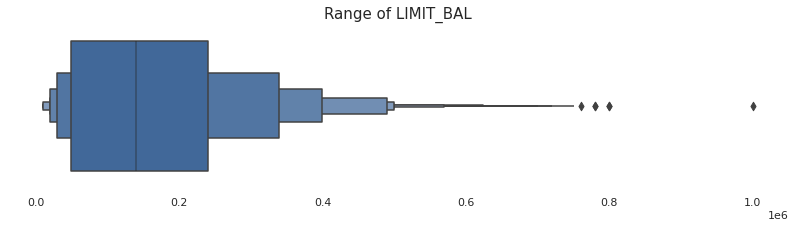

In [249]:
# BoxPlot to check outliers 
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['LIMIT_BAL'],color='#3266a8')
plt.grid(False)
plt.xlabel('')
plt.title('Range of LIMIT_BAL',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [250]:
def out_iqr(df , column):
  '''This Function gives IQR value lower bound and upper bound value
  and count the total outliers in numerical and in percentage
  '''
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
  return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))


In [251]:
#outliers
out_iqr(df,"LIMIT_BAL")

The IQR is 190000.0
The lower bound value is -235000.0
The upper bound value is 525000.0
Total number of outliers are 167 In percentage 0.5566666666666666


In [252]:
#Quantile Caping
df["LIMIT_BAL"] = np.where(df["LIMIT_BAL"] >525000, 500000,df['LIMIT_BAL'])

Skewness: 0.732246


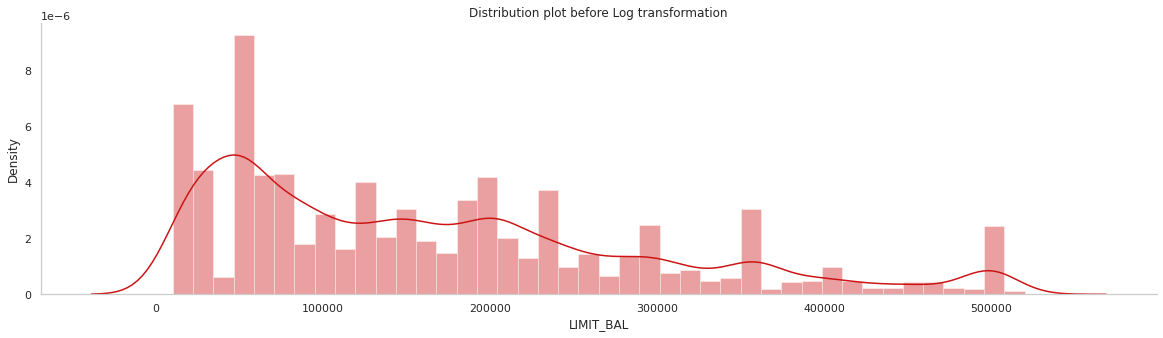

Skewness: -0.523521


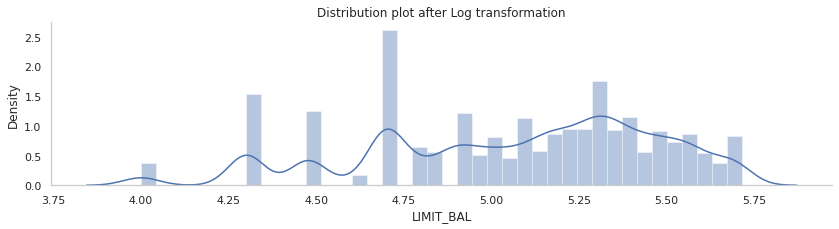

In [253]:
#Import warning
import warnings
warnings.filterwarnings("ignore")
# Before Log transformation
fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(a=df['LIMIT_BAL'],color='#CC1313',label="100% Equities",kde=True,ax=ax)
print("Skewness: %f" % df["AGE"].skew())
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.grid(False)
plt.show()

# After Log transformation
sns.distplot(np.log10(df['LIMIT_BAL']))
print("Skewness: %f"%np.log10(df["LIMIT_BAL"] ).skew())
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.grid(False)
plt.show()

In [254]:
#log transformation for LIMIT_BAL
df['LIMIT_BAL']=np.log10(df['LIMIT_BAL'])

**AGE**

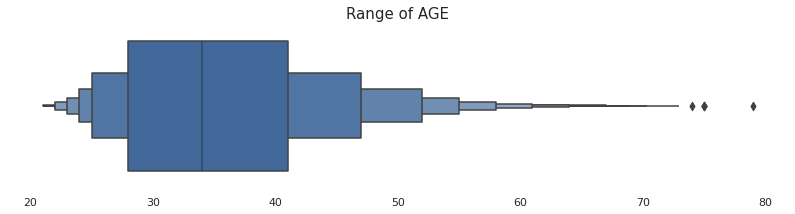

In [255]:
#BoxPlot to check outliers 
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['AGE'],color='#3266a8')
plt.grid(False)
plt.xlabel('')
plt.title('Range of AGE',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [256]:
#outliers
out_iqr(df,"AGE")

The IQR is 13.0
The lower bound value is 8.5
The upper bound value is 60.5
Total number of outliers are 272 In percentage 0.9066666666666666


In [257]:
#cap the Outliers
df["AGE"] = np.where(df["AGE"] >60, 60,df['AGE'])

Skewness: 0.647509


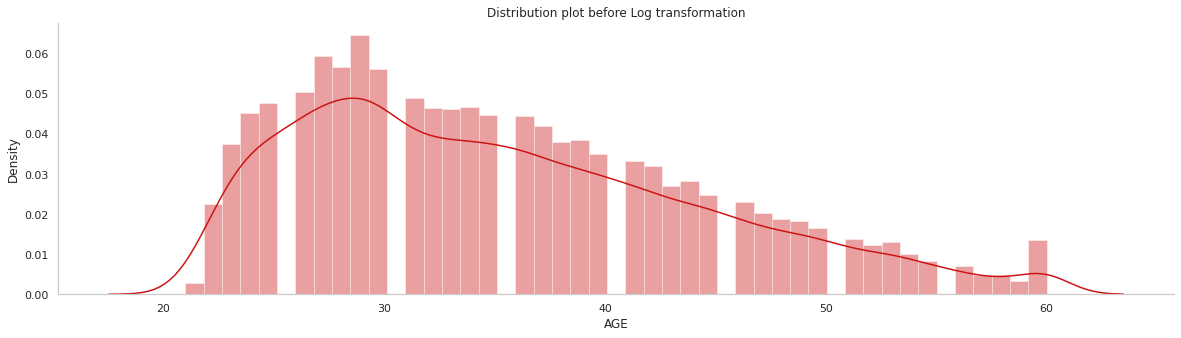

Skewness: 0.209356


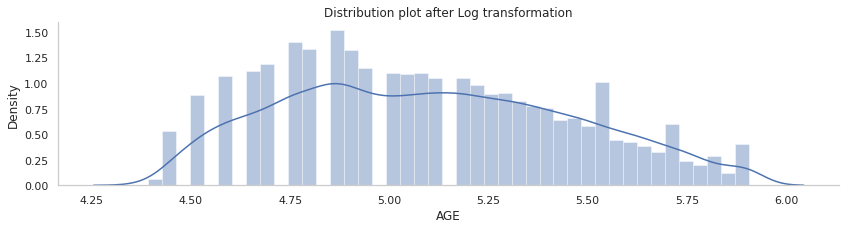

In [258]:
#Import warning
import warnings
warnings.filterwarnings("ignore")
# Before Log transformation
fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(a=df['AGE'],color='#CC1313',label="100% Equities",kde=True,ax=ax)
print("Skewness: %f" % df["AGE"].skew())
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.grid(False)
plt.show()

# After Log transformation
sns.distplot(np.log2(df['AGE']))
print("Skewness: %f" % np.log10(df["AGE"]).skew())
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.grid(False)
plt.show()

In [259]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter'],
      dtype='object')

In [260]:
#Log base10 transformation for AGE 
df["AGE"]=np.log10(df["AGE"])

**BALANCE AMOUNT**

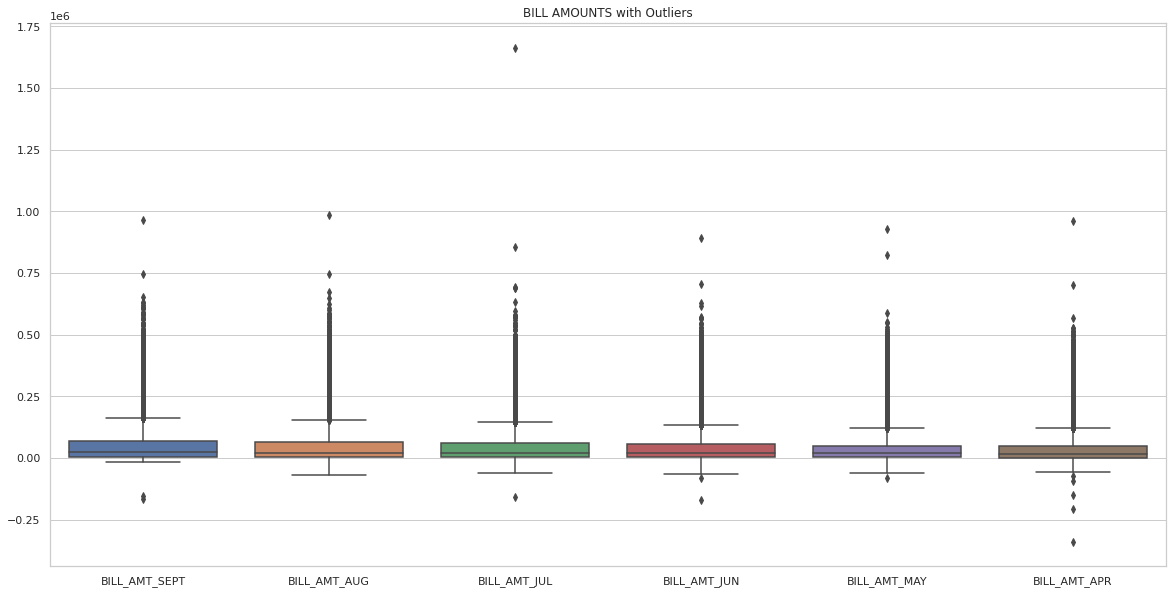

In [261]:
#Box plot fro Bill amounts
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']]).set(title='BILL AMOUNTS with Outliers')
plt.show()

In [262]:
out_iqr(df,'BILL_AMT_APR')
print("\n")
out_iqr(df,'BILL_AMT_MAY')
print("\n")
out_iqr(df,'BILL_AMT_JUN')
print("\n")
out_iqr(df,'BILL_AMT_JUL')
print("\n")
out_iqr(df,'BILL_AMT_AUG')
print("\n")
out_iqr(df,'BILL_AMT_SEPT')

The IQR is 47942.25
The lower bound value is -70657.375
The upper bound value is 121111.625
Total number of outliers are 2693 In percentage 8.976666666666667


The IQR is 48427.5
The lower bound value is -70878.25
The upper bound value is 122831.75
Total number of outliers are 2725 In percentage 9.083333333333334


The IQR is 52179.25
The lower bound value is -75942.125
The upper bound value is 132774.875
Total number of outliers are 2622 In percentage 8.74


The IQR is 57498.5
The lower bound value is -83581.5
The upper bound value is 146412.5
Total number of outliers are 2469 In percentage 8.23


The IQR is 61021.5
The lower bound value is -88547.5
The upper bound value is 155538.5
Total number of outliers are 2395 In percentage 7.983333333333333


The IQR is 63532.25
The lower bound value is -91739.625
The upper bound value is 162389.375
Total number of outliers are 2400 In percentage 8.0


In [263]:
def Impute_outliers(df,column):
    '''This function will cape the outliers with lower and upper bound
    ''' 
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    # calculate the IQR
    iqr = q3 - q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    lower_limit = (df[column]).quantile(0.20)
    upper_limit = (df[column]).quantile(0.90)
    df[column] = np.where(df[column] >Upper_tail, upper_limit,df[column])
    df[column] = np.where(df[column] <Lower_tail, lower_limit,df[column]) 
    return 

In [264]:
Impute_outliers(df,'BILL_AMT_APR')
Impute_outliers(df,'BILL_AMT_MAY')
Impute_outliers(df,'BILL_AMT_JUN')
Impute_outliers(df,'BILL_AMT_JUL')
Impute_outliers(df,'BILL_AMT_AUG')
Impute_outliers(df,'BILL_AMT_SEPT')      


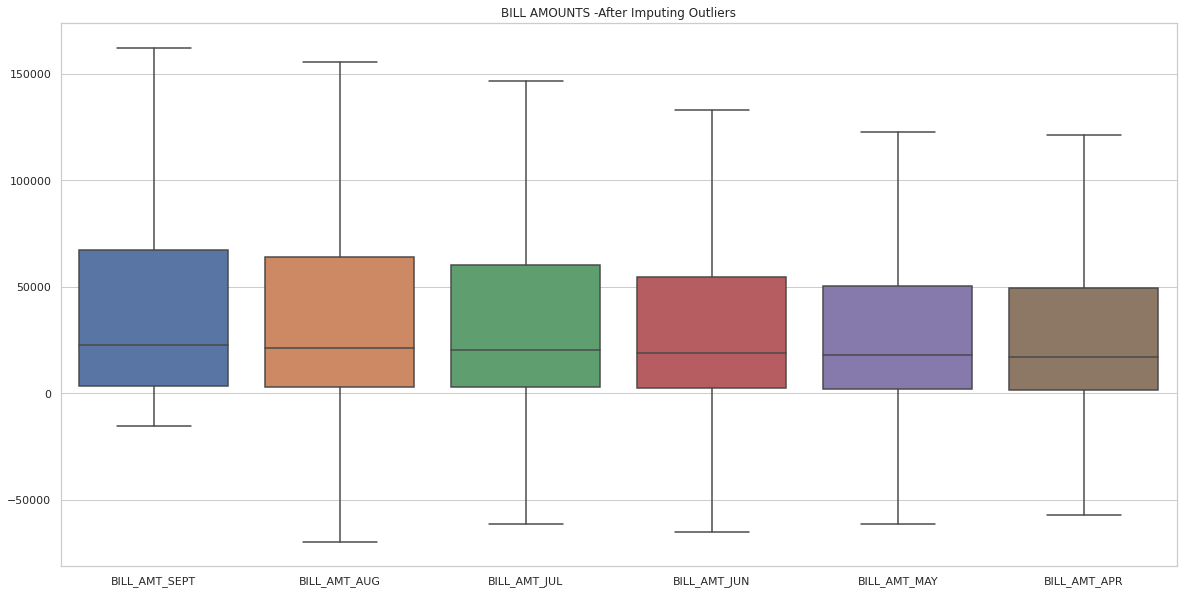

In [265]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']]).set(title='BILL AMOUNTS -After Imputing Outliers')
plt.show()

**PAYMENT AMOUNTS**

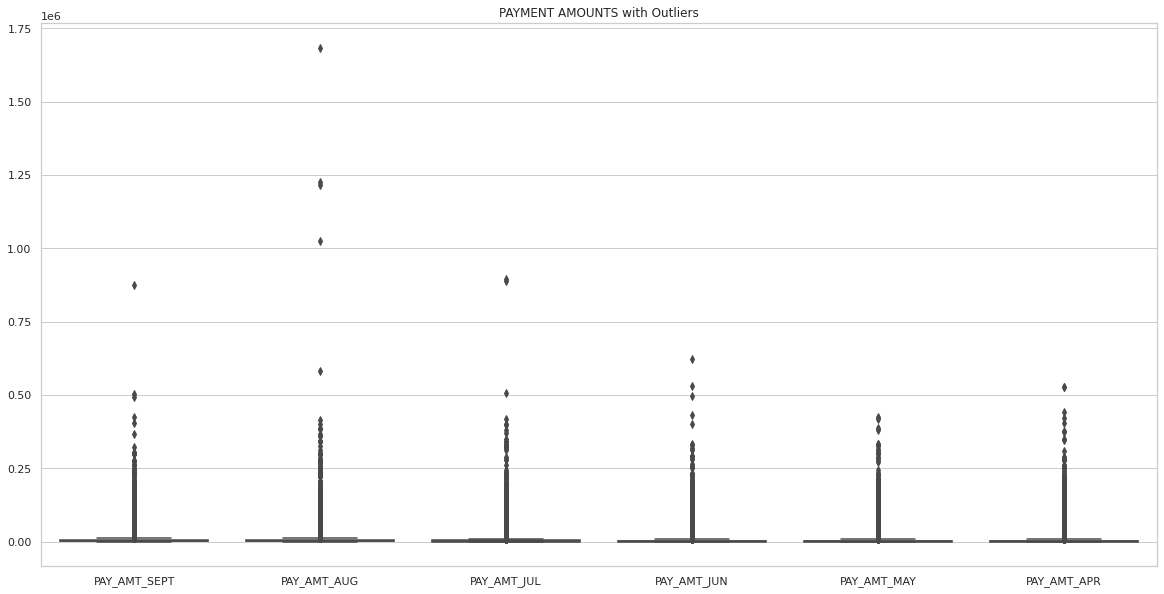

In [266]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]).set(title='PAYMENT AMOUNTS with Outliers')
plt.show()

In [267]:
out_iqr(df,'PAY_AMT_APR')
out_iqr(df,'PAY_AMT_MAY')
out_iqr(df,'PAY_AMT_JUN')
out_iqr(df,'PAY_AMT_JUL')
out_iqr(df,'PAY_AMT_AUG')
out_iqr(df,'PAY_AMT_SEPT')

The IQR is 3882.25
The lower bound value is -5705.625
The upper bound value is 9823.375
Total number of outliers are 2958 In percentage 9.86
The IQR is 3779.0
The lower bound value is -5416.0
The upper bound value is 9700.0
Total number of outliers are 2945 In percentage 9.816666666666666
The IQR is 3717.25
The lower bound value is -5279.875
The upper bound value is 9589.125
Total number of outliers are 2994 In percentage 9.98
The IQR is 4115.0
The lower bound value is -5782.5
The upper bound value is 10677.5
Total number of outliers are 2598 In percentage 8.66
The IQR is 4167.0
The lower bound value is -5417.5
The upper bound value is 11250.5
Total number of outliers are 2714 In percentage 9.046666666666667
The IQR is 4006.0
The lower bound value is -5009.0
The upper bound value is 11015.0
Total number of outliers are 2745 In percentage 9.15


In [268]:
df["LIMIT_BAL"] = np.where(df["LIMIT_BAL"] >525000, 500000,df['LIMIT_BAL'])

In [269]:
(df['PAY_AMT_APR']).quantile(0.90)

9600.0

In [270]:
Impute_outliers(df,'PAY_AMT_APR')
Impute_outliers(df,'PAY_AMT_MAY')
Impute_outliers(df,'PAY_AMT_JUN')
Impute_outliers(df,'PAY_AMT_JUL')
Impute_outliers(df,'PAY_AMT_AUG')
Impute_outliers(df,'PAY_AMT_SEPT')

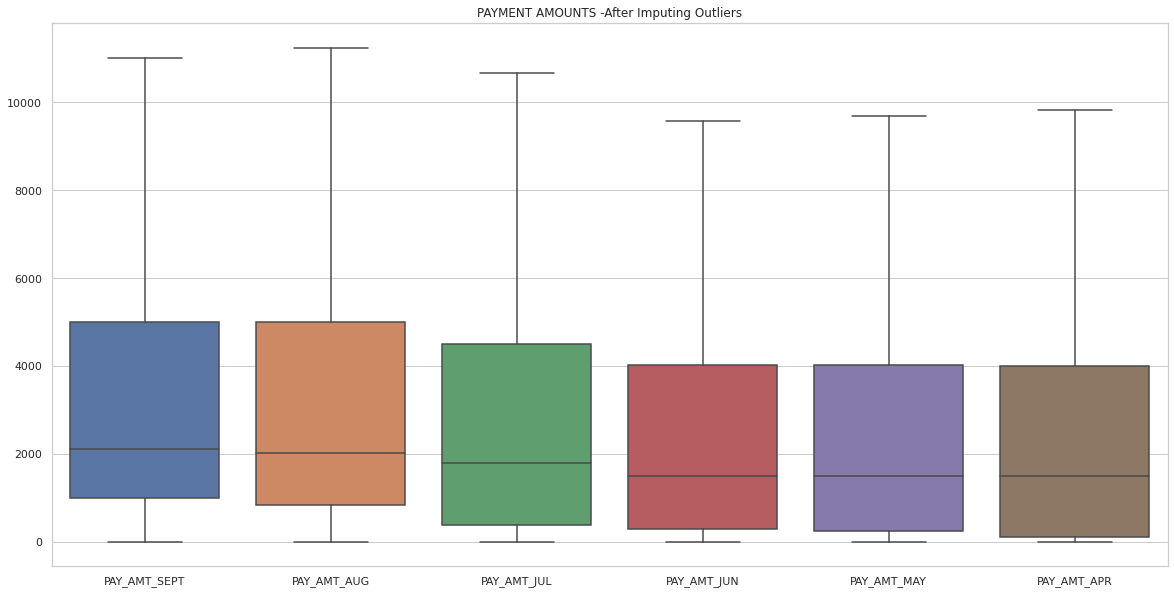

In [271]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]).set(title='PAYMENT AMOUNTS -After Imputing Outliers')
plt.show()

#EDA

**Categorical Features with Target**

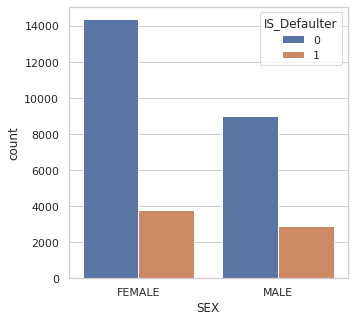

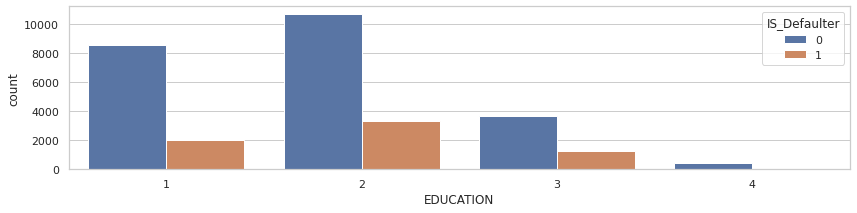

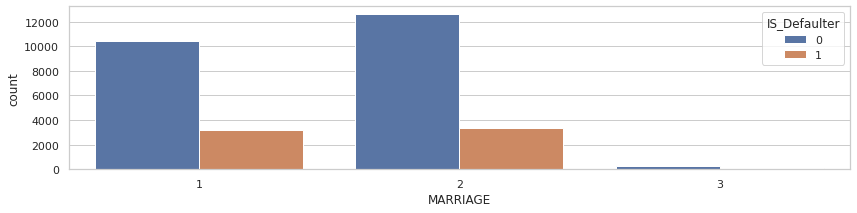

In [191]:
#countPlot for Categorical features
    
plt.figure(figsize=(5,5))
for i in df[['SEX', 'EDUCATION', 'MARRIAGE']]:
  sns.countplot(x=i,data=df,hue="IS_Defaulter")
  plt.show() 


**Conclusion**
* From the given dataset its seems that Female have slightely higher chances of being defaulters but when we look at the count of male vs Female its clear than men are more Defaulters.
* Count shows that people with good education use credit card and those who have university take most use of credit card.
* There is no trend in Marriange. Both married and non married take equally credit and have same amount of chances for being defaulter.

**PAYMENT Dues**

PAY_SEP


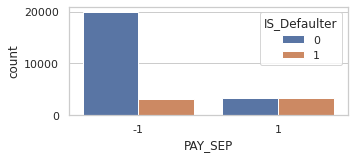

PAY_AUG


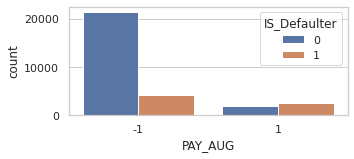

PAY_JUL


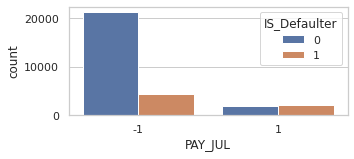

PAY_JUN


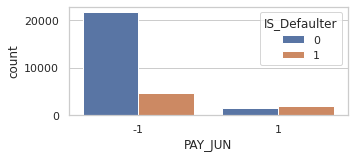

PAY_MAY


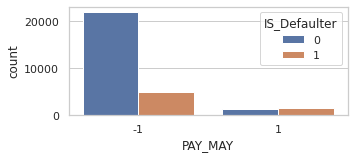

PAY_APR


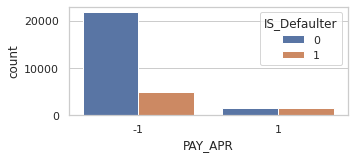

In [192]:
#countplot payment dues
for i in df[['PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']]:
  print(i)
  plt.figure(figsize=(5,2))
  sns.countplot(x=i,data=df,hue="IS_Defaulter")
  plt.show()

**Conclusion**
* There is a small amount of chance of being defaulters who pay on time but Those who dont pay on time have higer chance of being defaulter.

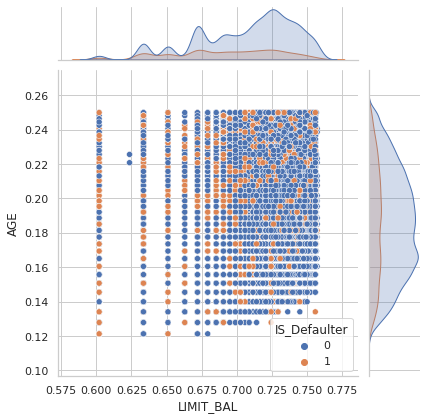

In [193]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,hue="IS_Defaulter",kind="scatter")
plt.show()

**Conclusion**
* There is no confirm pattern between age and limit balance. 

#Feature Selection

In [272]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter,SEX_MALE
ID,,,,,,,,,,,,,,,,,,,,,
1,4.301030,2,1,1.380211,1,1,-1,-1,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
2,5.079181,2,2,1.414973,-1,1,-1,-1,-1,1,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0
3,4.954243,2,2,1.531479,-1,-1,-1,-1,-1,-1,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
4,4.698970,2,1,1.568202,-1,-1,-1,-1,-1,-1,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
5,4.698970,2,1,1.755875,-1,-1,-1,-1,-1,-1,...,19146.0,19131.0,2000.0,10401.1,10000.0,9000.0,689.0,679.0,0,1


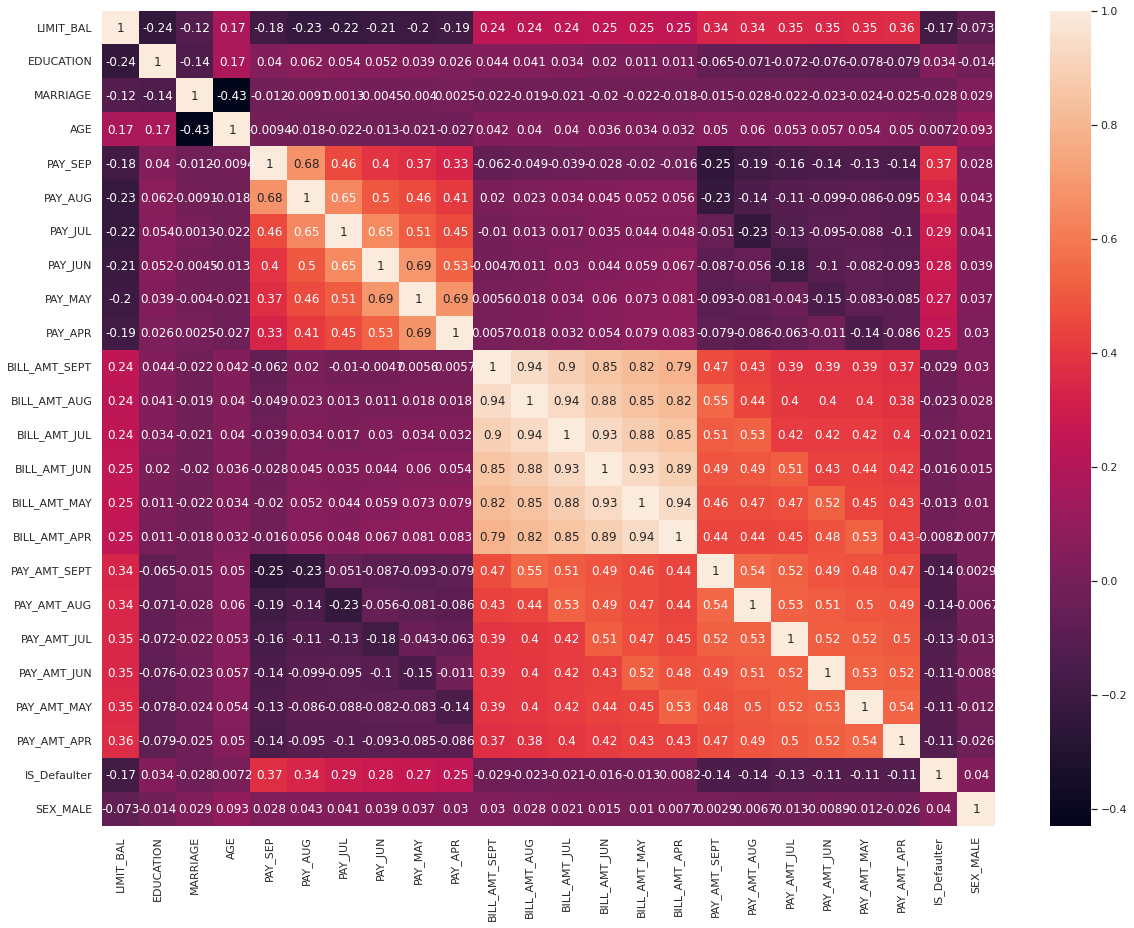

In [273]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation**
* BILL_AMT are very much collinear to each other (multicollinear). we will drop all except BILL_AMT_APR

In [274]:
#Drop multicollinear features
df.drop(['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY'],axis=1,inplace=True)

#Handling Class Imbalance

SMOTE - Synthetic Minority Oversampling Technique

In [275]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IS_Defaulter')], df['IS_Defaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IS_Defaulter'))
balanced_df['IS_Defaulter'] = y_smote

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


Before smote


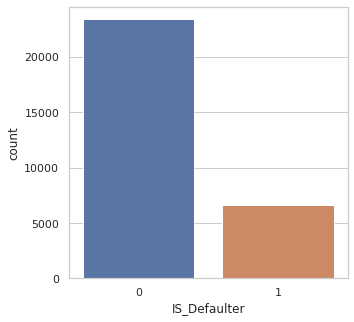

After smote


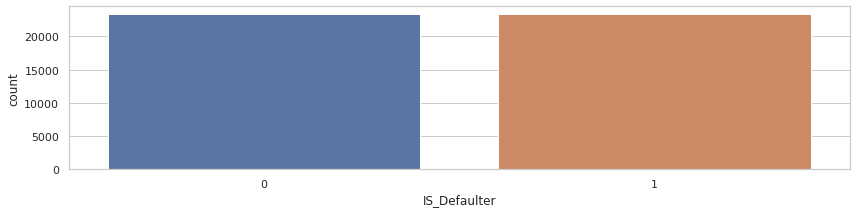

In [276]:
#check for class imbalance
plt.figure(figsize=(5,5))
print("Before smote")
sns.countplot('IS_Defaulter', data = df)
plt.show()
print("After smote")
sns.countplot('IS_Defaulter', data = balanced_df)
plt.show()

In [277]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IS_Defaulter'))]
y = balanced_df['IS_Defaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Models Used
* 1.Logistic Regresion.
* 2.Decision Tree Classifier
* 3.Random Foreset Classifier
* 4.XGBoost Classifier

In [278]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

#Evaluate matrices
def print_evaluate(true, predicted):  
    '''This function will print the confusin matrix and classification Report. 
    '''
    classi=classification_report(true,predicted)
    conf_mat=confusion_matrix(true, predicted)
    
    #Visualization Confusion Matrix
    print("Classification_Report")
    print(classi)
    f, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()
    print('__________________________________')

 

In [279]:
#These are for barplot in model evaluation.
method_names = []
method_scores = []


#Logistic Regression Model

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      4673
           1       0.61      0.76      0.68      4673

    accuracy                           0.64      9346
   macro avg       0.64      0.64      0.63      9346
weighted avg       0.64      0.64      0.63      9346



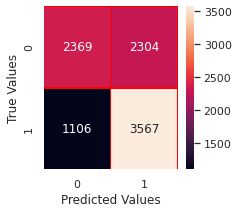

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.68      0.50      0.58     18691
           1       0.61      0.77      0.68     18691

    accuracy                           0.64     37382
   macro avg       0.65      0.64      0.63     37382
weighted avg       0.65      0.64      0.63     37382



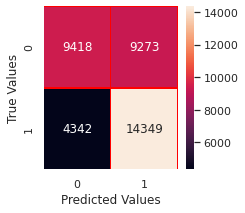

__________________________________


In [285]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression

#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)
#getting all scores for Logistic Regression
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_logi)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_logi)

method_names.append("Logistic_Reg.")
method_scores.append(logi.score(X_test,y_test))
 


#Decision Tree Classification

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4673
           1       0.76      0.79      0.78      4673

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



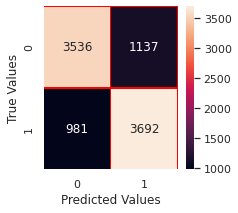

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00     18691

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382



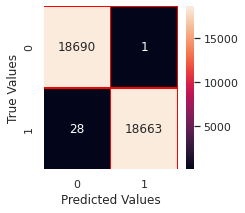

__________________________________


In [286]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)
#getting all scores for Decision Tree Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_dtc)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_dtc)

method_names.append("Decision_tree_class.")
method_scores.append(dtc.score(X_test,y_test))


#Decision_Tree with HyperParameter Tunning

In [288]:
# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11,12,13,14,15,20]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [289]:
#Grid Search cross validation over Decision Tree
from sklearn.model_selection import GridSearchCV
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=200)
grid.fit(X_train,y_train)
#best parameters that achieves higher score
grid.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      4673
           1       0.83      0.70      0.76      4673

    accuracy                           0.78      9346
   macro avg       0.79      0.78      0.78      9346
weighted avg       0.79      0.78      0.78      9346



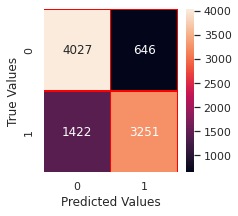

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     18691
           1       0.90      0.75      0.82     18691

    accuracy                           0.83     37382
   macro avg       0.84      0.83      0.83     37382
weighted avg       0.84      0.83      0.83     37382



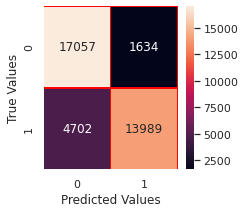

__________________________________


In [290]:
#Tune the Decision tree with hyper parametre
dt_hyper=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=12,
 min_samples_leaf= 1,
 min_samples_split= 9)
dt_hyper.fit(X_train,y_train)
#class prediction of y
y_pred_dtc_hyper = dt_hyper.predict(X_test)
y_train_pred_dtc_hyper=dt_hyper.predict(X_train)
#getting all scores for Decision Tree Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_dtc_hyper)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_dtc_hyper)

method_names.append("DT_with_Hyperparameter")
method_scores.append(dt_hyper.score(X_test,y_test))

#Random Forest Classification

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4673
           1       0.88      0.81      0.84      4673

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



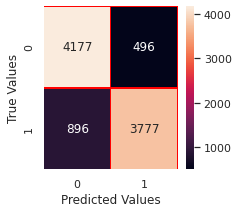

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00     18691

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382



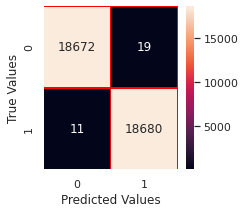

__________________________________


In [291]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)
#getting all scores for Random Forest Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_rfc)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_rfc)

method_names.append("Random_forest_classi.")
method_scores.append(rfc.score(X_test,y_test))

In [292]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,15]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



In [293]:
#Random search over Random  Forest
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator =rfc ,param_distributions = random_grid,
               n_iter = 5, cv = 3, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30],
                                        'n_estimators': [500]},
                   random_state=35, verbose=2)

In [294]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      4673
           1       0.86      0.77      0.81      4673

    accuracy                           0.82      9346
   macro avg       0.83      0.82      0.82      9346
weighted avg       0.83      0.82      0.82      9346



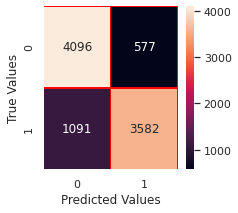

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18691
           1       0.91      0.83      0.87     18691

    accuracy                           0.87     37382
   macro avg       0.88      0.87      0.87     37382
weighted avg       0.88      0.87      0.87     37382



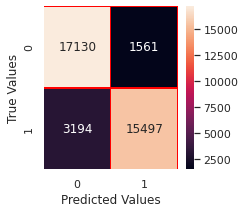

__________________________________


In [295]:
rfc_hyper = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 5,max_samples=0.5, max_features = "auto", max_depth= 20, bootstrap=True) 
rfc_hyper.fit( X_train, y_train) 

y_pred_rfc_hyper = rfc_hyper.predict(X_test)
y_train_pred_rfc_hyper = rfc_hyper.predict(X_train)

#getting all scores for Random Forest Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_rfc_hyper)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_rfc_hyper)

method_names.append("RFclassi_HyperTune")
method_scores.append(rfc_hyper.score(X_test,y_test))

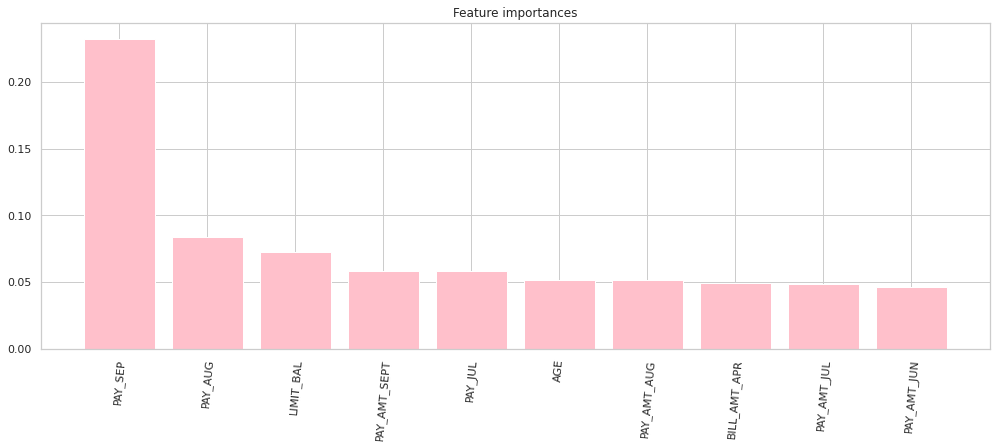

In [296]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rfc_hyper.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

#XG Boosting

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4673
           1       0.85      0.75      0.80      4673

    accuracy                           0.81      9346
   macro avg       0.82      0.81      0.81      9346
weighted avg       0.82      0.81      0.81      9346



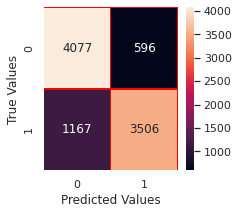

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.78      0.88      0.82     18691
           1       0.86      0.75      0.80     18691

    accuracy                           0.81     37382
   macro avg       0.82      0.81      0.81     37382
weighted avg       0.82      0.81      0.81     37382



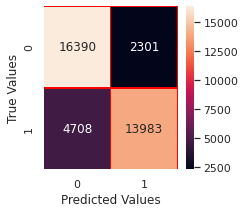

__________________________________


In [297]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)
#getting all scores for XG Boosting Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_xgb)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_pred_xgb)

method_names.append("XG_Boost")
method_scores.append(xgb.score(X_test,y_test))

#XGB With HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=10, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

Test set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      4673
           1       0.86      0.76      0.81      4673

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



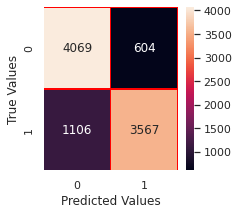

__________________________________
Train set evaluation:
_____________________________________
Classification_Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.85     18691
           1       0.88      0.78      0.83     18691

    accuracy                           0.84     37382
   macro avg       0.84      0.84      0.84     37382
weighted avg       0.84      0.84      0.84     37382



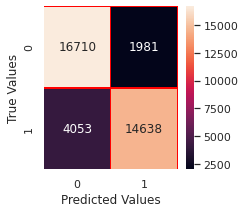

__________________________________


In [ ]:
optimal_xgb = gsearch1.best_estimator_optimal_xgb = gsearch1.best_estimator_
# Get the predicted classes
train_preds_hyper = optimal_xgb.predict(X_train)
test_preds_hyper = optimal_xgb.predict(X_test)

#getting all scores for XG Boosting Classifier
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_preds_hyper)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_preds_hyper)

method_names.append("XG_Boost_hyper")
method_scores.append(optimal_xgb.score(X_test,y_test))

**Model Comparison**

Let's see differences between our methods scores!

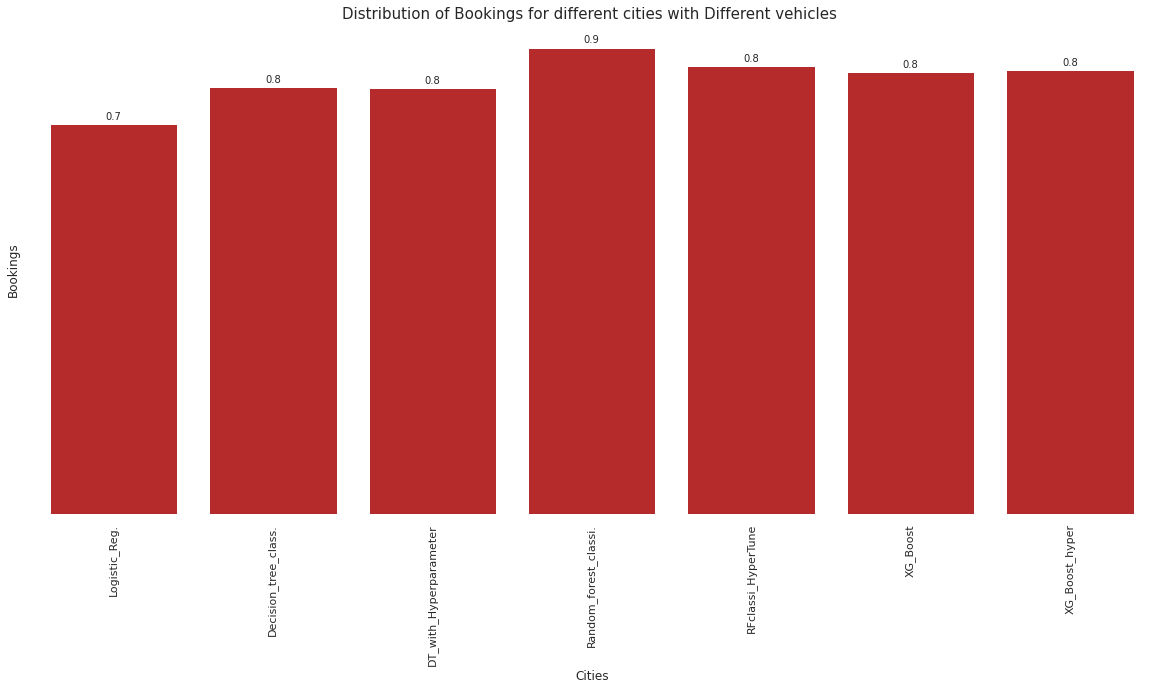

In [ ]:
fig, ax = plt.subplots(figsize=(20, 9))
bars = sns.barplot(x=method_names,y=method_scores,color='#CC1313',ax=ax)
for i in range(7):
 bars.patches[i]
 plt.xticks(rotation=90)
ax = plt.gca()
for spine in ax.spines.values():
     spine.set_visible(False)
plt.grid(False)
plt.xlabel('Cities')
plt.ylabel('Bookings')
plt.title(f'Distribution of Bookings for different cities with Different vehicles ',size=15)
ax.axes.yaxis.set_ticklabels([])
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.1f'),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Conclusion**
* After performing the various model we the get the best accuracy form the Random forest and XGBoost classifier.

* Logestic Regression is the least accurate as compared to other models performed.

* XGBoost has the best precision and the recall balance.

* Higher recall can be achieved if low precision is acceptable.

* Model can be improved with more data and other advance models with higher computation power.